In [37]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
# import data
NY_crime_2013 = pd.read_excel('data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', 
                              skiprows=range(4))

In [13]:
NY_crime_2013.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [15]:
# check the NaN distribution in each column
NY_crime_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [21]:
# drop the Rape (revised definition)1 column
NY_crime_2013.drop(NY_crime_2013.columns[4], axis=1, inplace=True)

In [22]:
NY_crime_2013.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [25]:
# check the data type of each column
NY_crime_2013.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [69]:
# since the assumed multivariable regression model includes only population, murder and robbery column
# keep only those three and property crime as the output
col = NY_crime_2013.columns
NY_crime_2013_clean = NY_crime_2013[[col[1], col[3], col[5], col[7]]]

In [70]:
NY_crime_2013_clean.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861.0,0.0,0.0,12.0
1,2577.0,0.0,0.0,24.0
2,2846.0,0.0,0.0,16.0
3,97956.0,8.0,227.0,4090.0
4,6388.0,0.0,4.0,223.0


In [71]:
NY_crime_2013_clean.columns

Index(['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery',
       'Property\ncrime'],
      dtype='object')

In [72]:
# rename column
NY_crime_2013_clean.rename(columns={NY_crime_2013_clean.columns[1]: 'Murder', 
                                    NY_crime_2013_clean.columns[3]: 'Property_crime'}, inplace=True)

In [73]:
NY_crime_2013_clean.head()

,Population,Murder,Robbery,Property_crime
0,1861.0,0.0,0.0,12.0
1,2577.0,0.0,0.0,24.0
2,2846.0,0.0,0.0,16.0
3,97956.0,8.0,227.0,4090.0
4,6388.0,0.0,4.0,223.0


In [74]:
# drop rows if any column of that row has NaN
NY_crime_2013_clean.dropna(inplace=True)

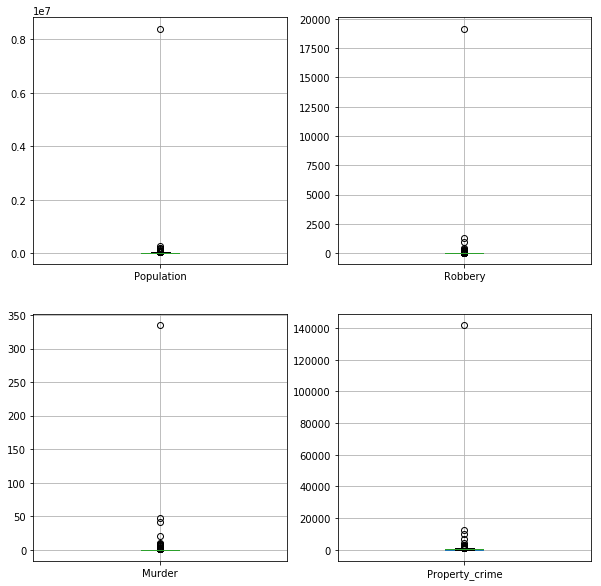

In [75]:
# inspect each column to see if there is any potential outlier
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
NY_crime_2013_clean.boxplot(column='Population', ax=ax[0][0])
NY_crime_2013_clean.boxplot(column='Murder', ax=ax[1][0])
NY_crime_2013_clean.boxplot(column='Robbery', ax=ax[0][1])
NY_crime_2013_clean.boxplot(column='Property_crime', ax=ax[1][1])
plt.show()

In [76]:
# clean up the outliers
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Population'] < 8000000]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Murder'] < 300]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Robbery'] < 17500]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Property_crime'] < 120000]

In [77]:
# convert murder and robbery column to categorical variable
NY_crime_2013_clean['Murder'] = np.where(NY_crime_2013_clean['Murder'] > 0, 1, 0)
NY_crime_2013_clean['Robbery'] = np.where(NY_crime_2013_clean['Robbery'] > 0, 1, 0)

In [78]:
# create another column population square
NY_crime_2013_clean['Population_sq'] = np.square(NY_crime_2013_clean['Population'])

In [79]:
NY_crime_2013_clean.head()

,Population,Murder,Robbery,Property_crime,Population_sq
0,1861.0,0,0,12.0,3.463321e+06
1,2577.0,0,0,24.0,6.640929e+06
2,2846.0,0,0,16.0,8.099716e+06
3,97956.0,1,1,4090.0,9.595378e+09
4,6388.0,0,1,223.0,4.080654e+07


In [80]:
# rearrange the column order
NY_crime_2013_clean = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Robbery', 'Property_crime']]

In [81]:
NY_crime_2013_clean.head()

,Population,Population_sq,Murder,Robbery,Property_crime
0,1861.0,3.463321e+06,0,0,12.0
1,2577.0,6.640929e+06,0,0,24.0
2,2846.0,8.099716e+06,0,0,16.0
3,97956.0,9.595378e+09,1,1,4090.0
4,6388.0,4.080654e+07,0,1,223.0
